#Install Packages

In [ ]:
pip install sklearn-contrib-py-earth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.9 MB/s 
  ERROR: Failed building wheel for sklearn-contrib-py-earth
  Running setup.py clean for sklearn-contrib-py-earth
Failed to build sklearn-contrib-py-earth
    Running setup.py install for sklearn-contrib-py-earth ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-vd76qt54/sklearn-contrib-py-earth_c8379eb344754e1b85a0a8bb3bdf66d1/setup.py'"'"'; __file__='"'"'/tmp/pip-install-vd76qt54/sklearn-contrib-py-earth_c8379eb344754e1b85a0a8bb3bdf66d1/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /t

In [ ]:
!pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-learn-contrib/py-earth (to revision v0.2dev) to /tmp/pip-req-build-2gv8l0r5
  Running command git clone -q https://github.com/scikit-learn-contrib/py-earth /tmp/pip-req-build-2gv8l0r5
  Running command git checkout -b v0.2dev --track origin/v0.2dev
  Switched to a new branch 'v0.2dev'
  Branch 'v0.2dev' set up to track remote branch 'v0.2dev' from 'origin'.
  Created wheel for sklearn-contrib-py-earth: filename=sklearn_contrib_py_earth-0.1.0+16.g400f84d-cp37-cp37m-linux_x86_64.whl size=3997303 sha256=fe63e5132531915fb12b2be67fc69bfbcd96d5213a76e0cc6808e0c371364ca8
  Stored in directory: /tmp/pip-ephem-wheel-cache-jfohvyk6/wheels/79/d7/aa/1e418a9aea84424ef2ce2697ae7cccace322976388d3692e8e
Successfully built sklearn-contrib-py-earth


In [ ]:
pip install pygam

#Importing Dataset

In [ ]:
# import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline

# read data_set
data = pd.read_csv("/content/nba.csv")

data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


#PyEarth Model

In [ ]:
import pandas as pd
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_regression
from pyearth import Earth

In [ ]:
X = data[['GP','MIN','PTS','FGM','FGA','FTA','OREB','DREB','REB','AST','STL','BLK']]  # X varaibles 

In [ ]:
y = data['TARGET_5Yrs'] #target varible 

In [ ]:
model = Earth()

#specify cross-validation method to use to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)    #you can play with diffrent values of spline 

In [ ]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

In [ ]:
#evaluate model performance
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#print results
mean(scores)

-0.38382880131504493

In [ ]:
scores

array([-0.38848911, -0.35827637, -0.38605909, -0.3684512 , -0.38404356,
       -0.36992819, -0.37919111, -0.39500414, -0.40989981, -0.40358516,
       -0.40302141, -0.37935507, -0.40281138, -0.38259211, -0.36913573,
       -0.40521004, -0.36357834, -0.36295359, -0.38641483, -0.38471293,
       -0.38078781, -0.36273879, -0.39476416, -0.38494962, -0.37578519,
       -0.39446245, -0.38751095, -0.3872961 , -0.39774414, -0.36611165])

In [ ]:
model.fit(X,y)

Earth()

In [ ]:
model.score(X,y)   # accuracy of Earth model

0.19711495189960415

#Test and train 

In [ ]:

# Dividing data into train and validation datasets
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.33, random_state = 1)


#LogisticGAM Model

In [ ]:
#from pygam.datasets import wage
from pygam import LinearGAM, s, f
from pygam import LogisticGAM, s, f

gam = LogisticGAM(s(0) + s(1) + f(2)).fit(X, y)
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     87.5218
Link Function:                        LogitLink Log Likelihood:                                  -673.0446
Number of Samples:                         1294 AIC:                                             1521.1329
                                                AICc:                                            1534.2915
                                                UBRE:                                               3.2296
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2146
Feature Function                  Lam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  


In [ ]:
import pandas as pd        
from pygam import LogisticGAM

#load the breast cancer data setdata = load_breast_cancer()
#keep first 6 features only


In [ ]:
#Fit a model with the default parameters
gam = LogisticGAM(n_splines = 25).fit(X, y)

/usr/local/lib/python3.7/dist-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/usr/local/lib/python3.7/dist-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *


In [ ]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                    106.0378
Link Function:                        LogitLink Log Likelihood:                                  -636.3684
Number of Samples:                         1294 AIC:                                             1484.8124
                                                AICc:                                            1504.3141
                                                UBRE:                                                3.213
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2574
Feature Function                  Lam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [ ]:
gam.accuracy(X, y)  # Accurcy of gam model

0.7550231839258115

#Partial dependency plots

<Figure size 432x288 with 0 Axes>

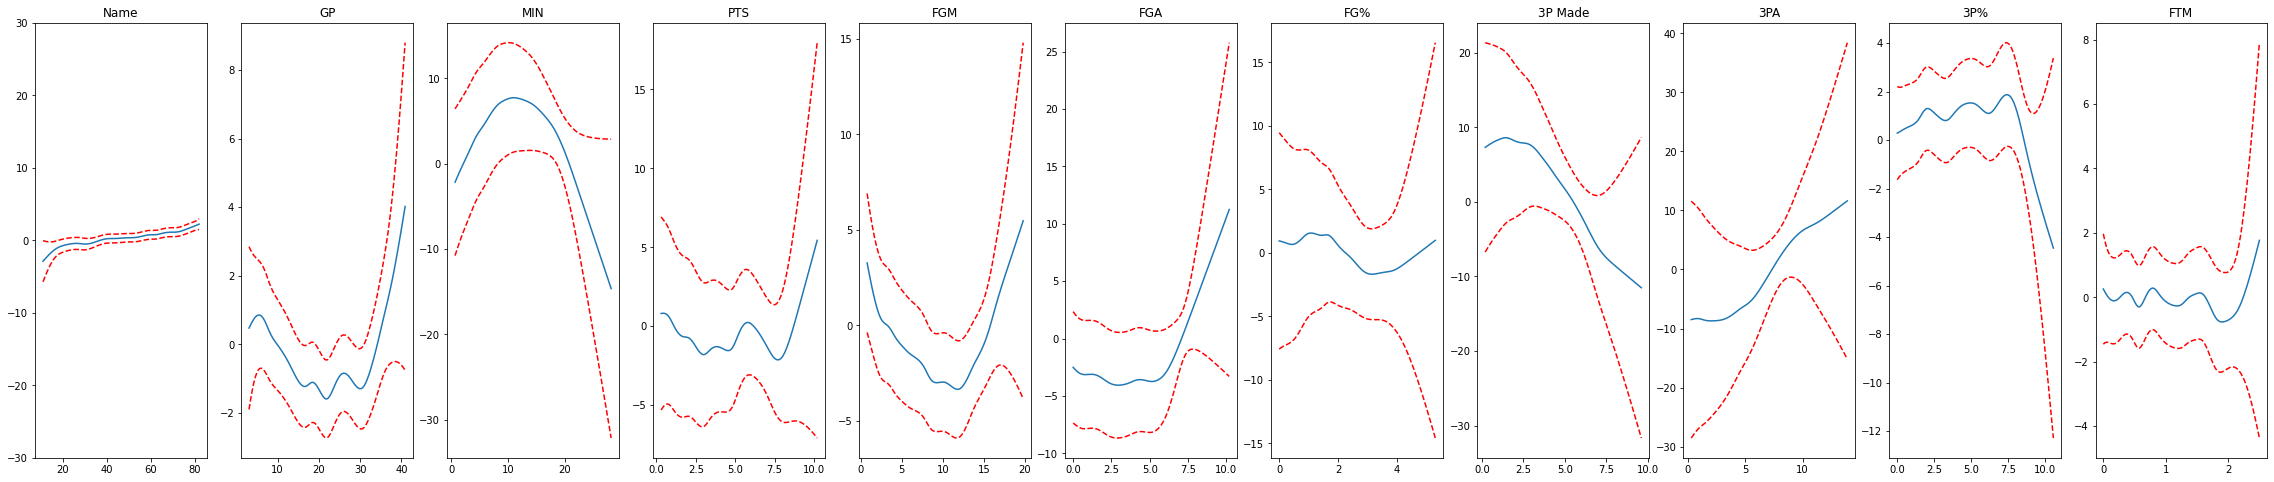

In [ ]:
titles = data.columns[0:21]
plt.figure()
fig, axs = plt.subplots(1,11,figsize=(40, 8))
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

PyEarth Model :
The py-earth package is a Python implementation of Jerome Friedman’s Multivariate Adaptive Regression Splines algorithm, in the style of scikit-learn. For more information about Multivariate Adaptive Regression Splines.

PyGam:
Generalized Additive Models (GAMs) are smooth semi-parametric models of the form:
g(E[y|X])=β0+f1(X1)+f2(X2,X3)+…+fM(XN)

where X.T = [X_1, X_2, ..., X_N] are independent variables, y is the dependent variable, and g() is the link function that relates our predictor variables to the expected value of the dependent variable.


Explantion:
Linear Models are considered the Swiss Army Knife of models. There are many adaptations we can make to adapt the model to perform well on a variety of conditions and data types.

Generalised Additive Models (GAMs) are an adaptation that allows us to model non-linear data while maintaining explainability.


Above we bulid two models , Py earth model and Py Gam model. Both model is NO-linear kind uses splines.

Py Earth model fit only curves on knots So there are very less chnaces that cruve will fit using splines. We take only 10 splines , As spline increase chances of fitting curve will more. 


Py Gam model Not just fit the cruve but it replicated the function. 
Meaning : Curve will fitted using splines and then logistic regression apllied so its like itreation work. every tie curv fit it make it in Logistic function. again on second value it fit the curve and again apply the logistic fumction. Like wise regression is happend and Model fit the curve from partail above and below as we can see in plot. 

That why accuracy of Gam model is higher than the Oy earth model.

overall: Spline model only fits the curve But GAM model Fit the curve and use that in logistic model. 